In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# importing Dependencies

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 5. Univariate Analysis 


## Explore RainTomorrow target variable 
### Check for missing values

In [9]:
df['RainTomorrow'].isnull().sum()

3267

In [10]:
df['RainTomorrow'].nunique()

2

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

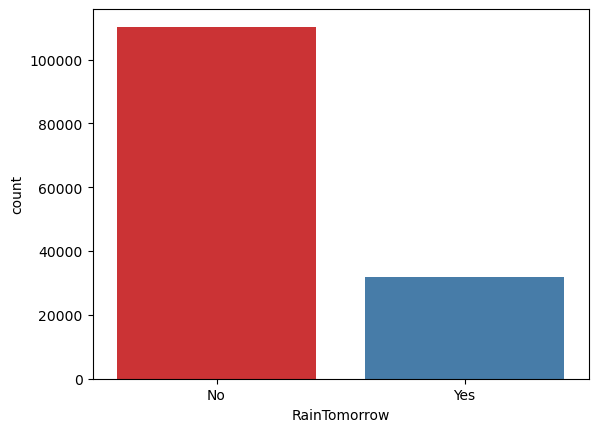

In [14]:
sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

# 6. Bivariate Analysis

## Explore Categorical Variables

In [15]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [17]:
'''Summary of categorical variables 
There is a date variable. It is denoted by Date column.
There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
There are two binary categorical variables - RainToday and RainTomorrow.
RainTomorrow is the target variable.'''

'Summary of categorical variables \nThere is a date variable. It is denoted by Date column.\nThere are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.\nThere are two binary categorical variables - RainToday and RainTomorrow.\nRainTomorrow is the target variable.'

In [18]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [21]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [22]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [24]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [26]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [27]:
df = df.dropna(subset=['RainTomorrow'])

In [28]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

## Explore Location variable

In [29]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [30]:
df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [31]:
df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [32]:
df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [33]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

## Explore Numerical Variables

In [34]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [35]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [36]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [37]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [38]:
'''On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.'''

'On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.\n\nI will draw boxplots to visualise outliers in the above variables.'

Text(0, 0.5, 'WindSpeed3pm')

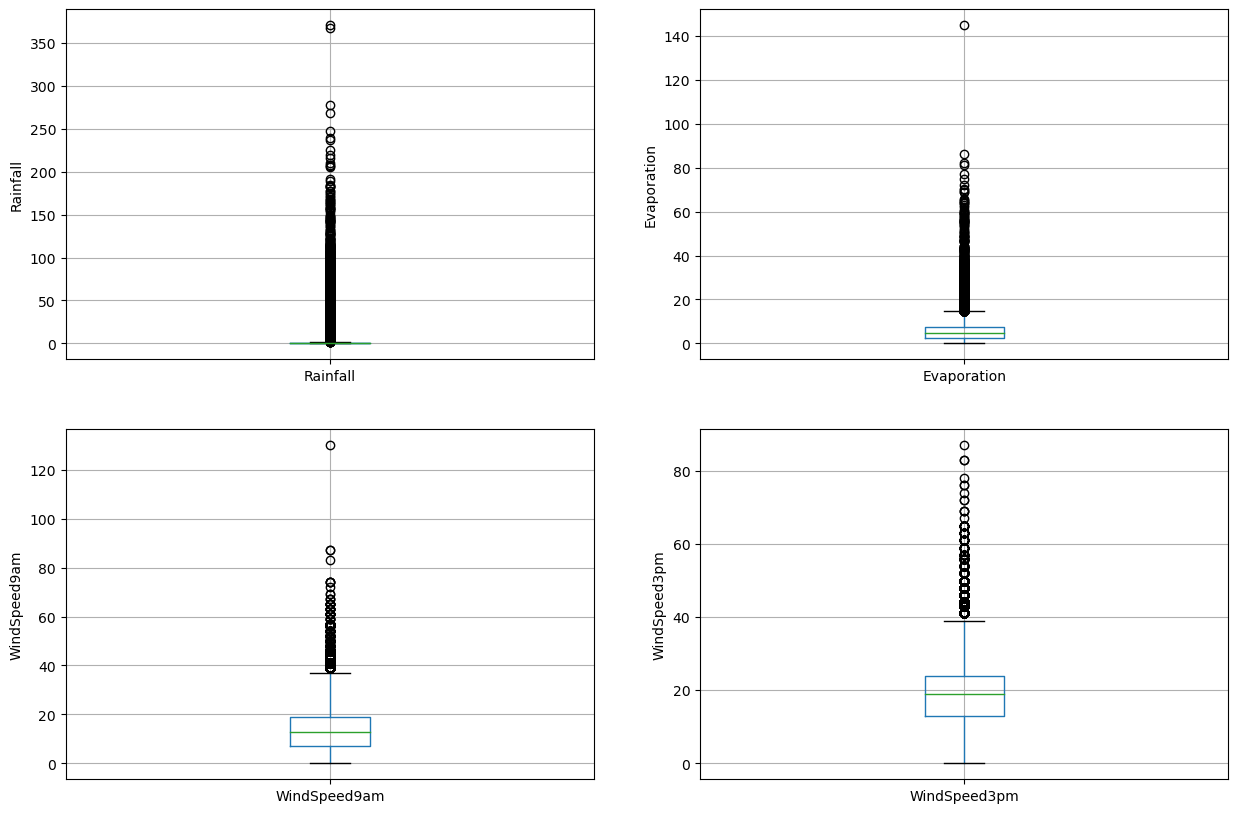

In [39]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [40]:
#Now, I will plot the histograms to check distributions to find out if they are normal or skewed

Text(0, 0.5, 'RainTomorrow')

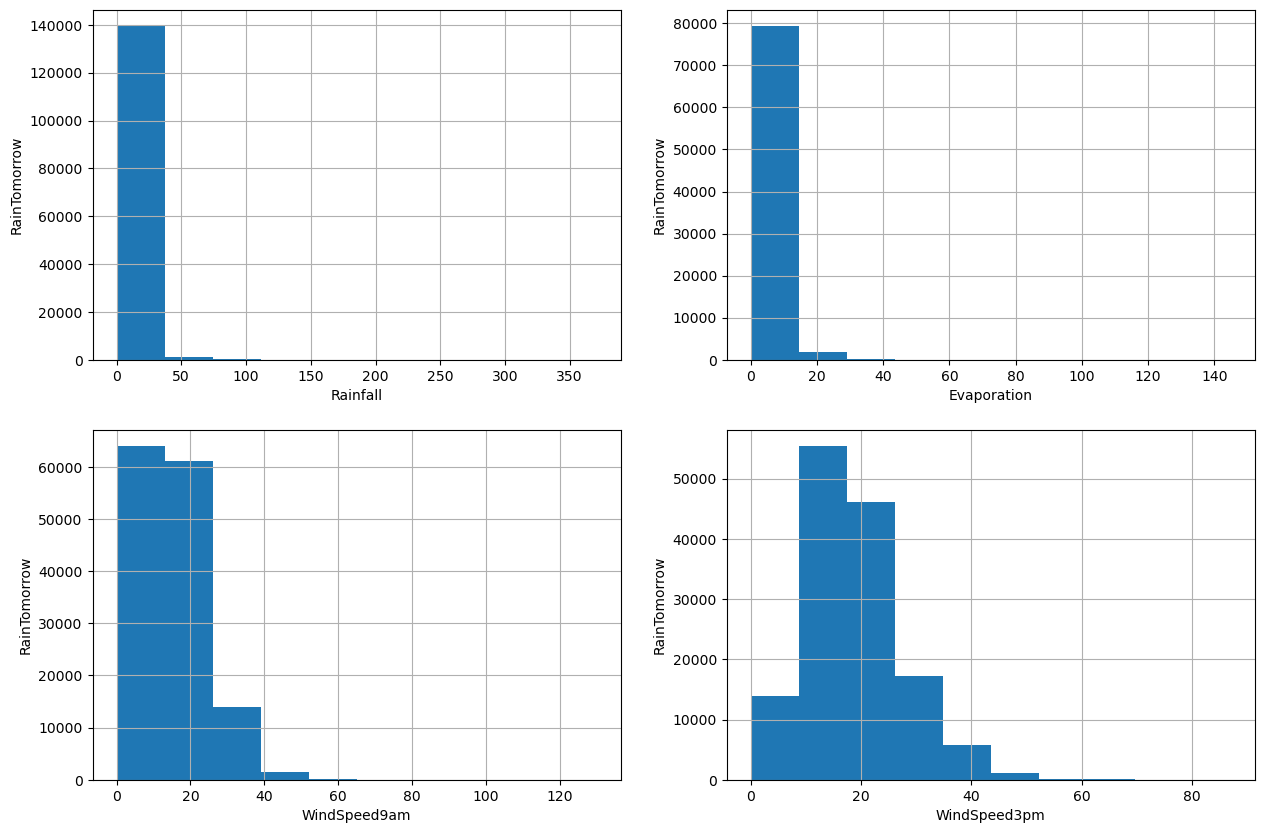

In [41]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [42]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [43]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [44]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [45]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


#  Multivariate Analysis

In [46]:
correlation = df.corr()

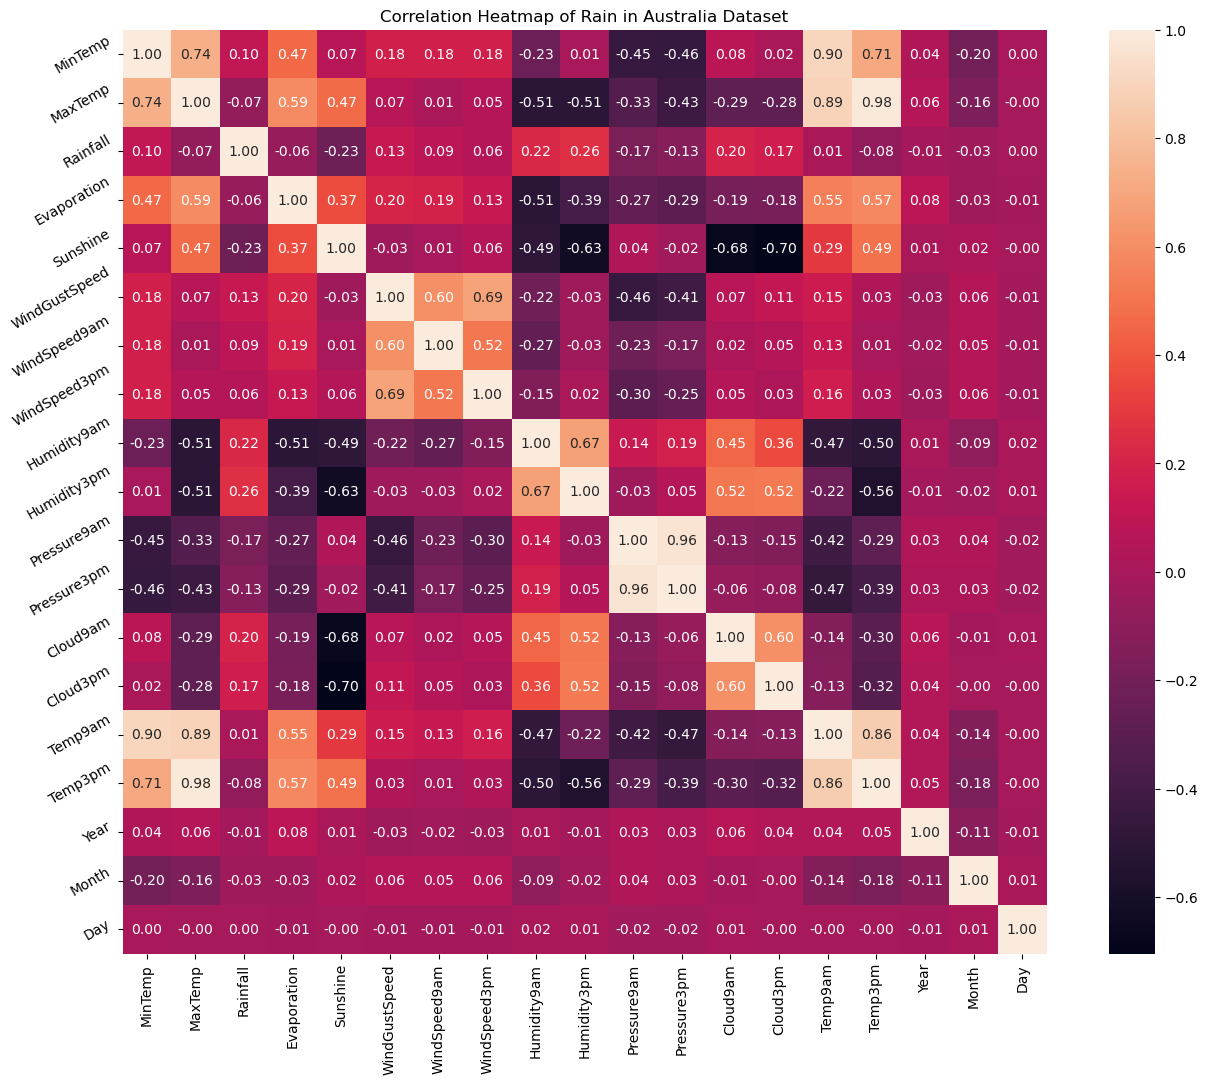

In [47]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [48]:
'''Interpretation
From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).'''

'Interpretation\nFrom the above correlation heat map, we can conclude that :-\n\nMinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).\n\nMinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).\n\nMinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).\n\nMaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).\n\nMaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).\n\nWindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).\n\nPressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).\n\nTemp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).'

In [49]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

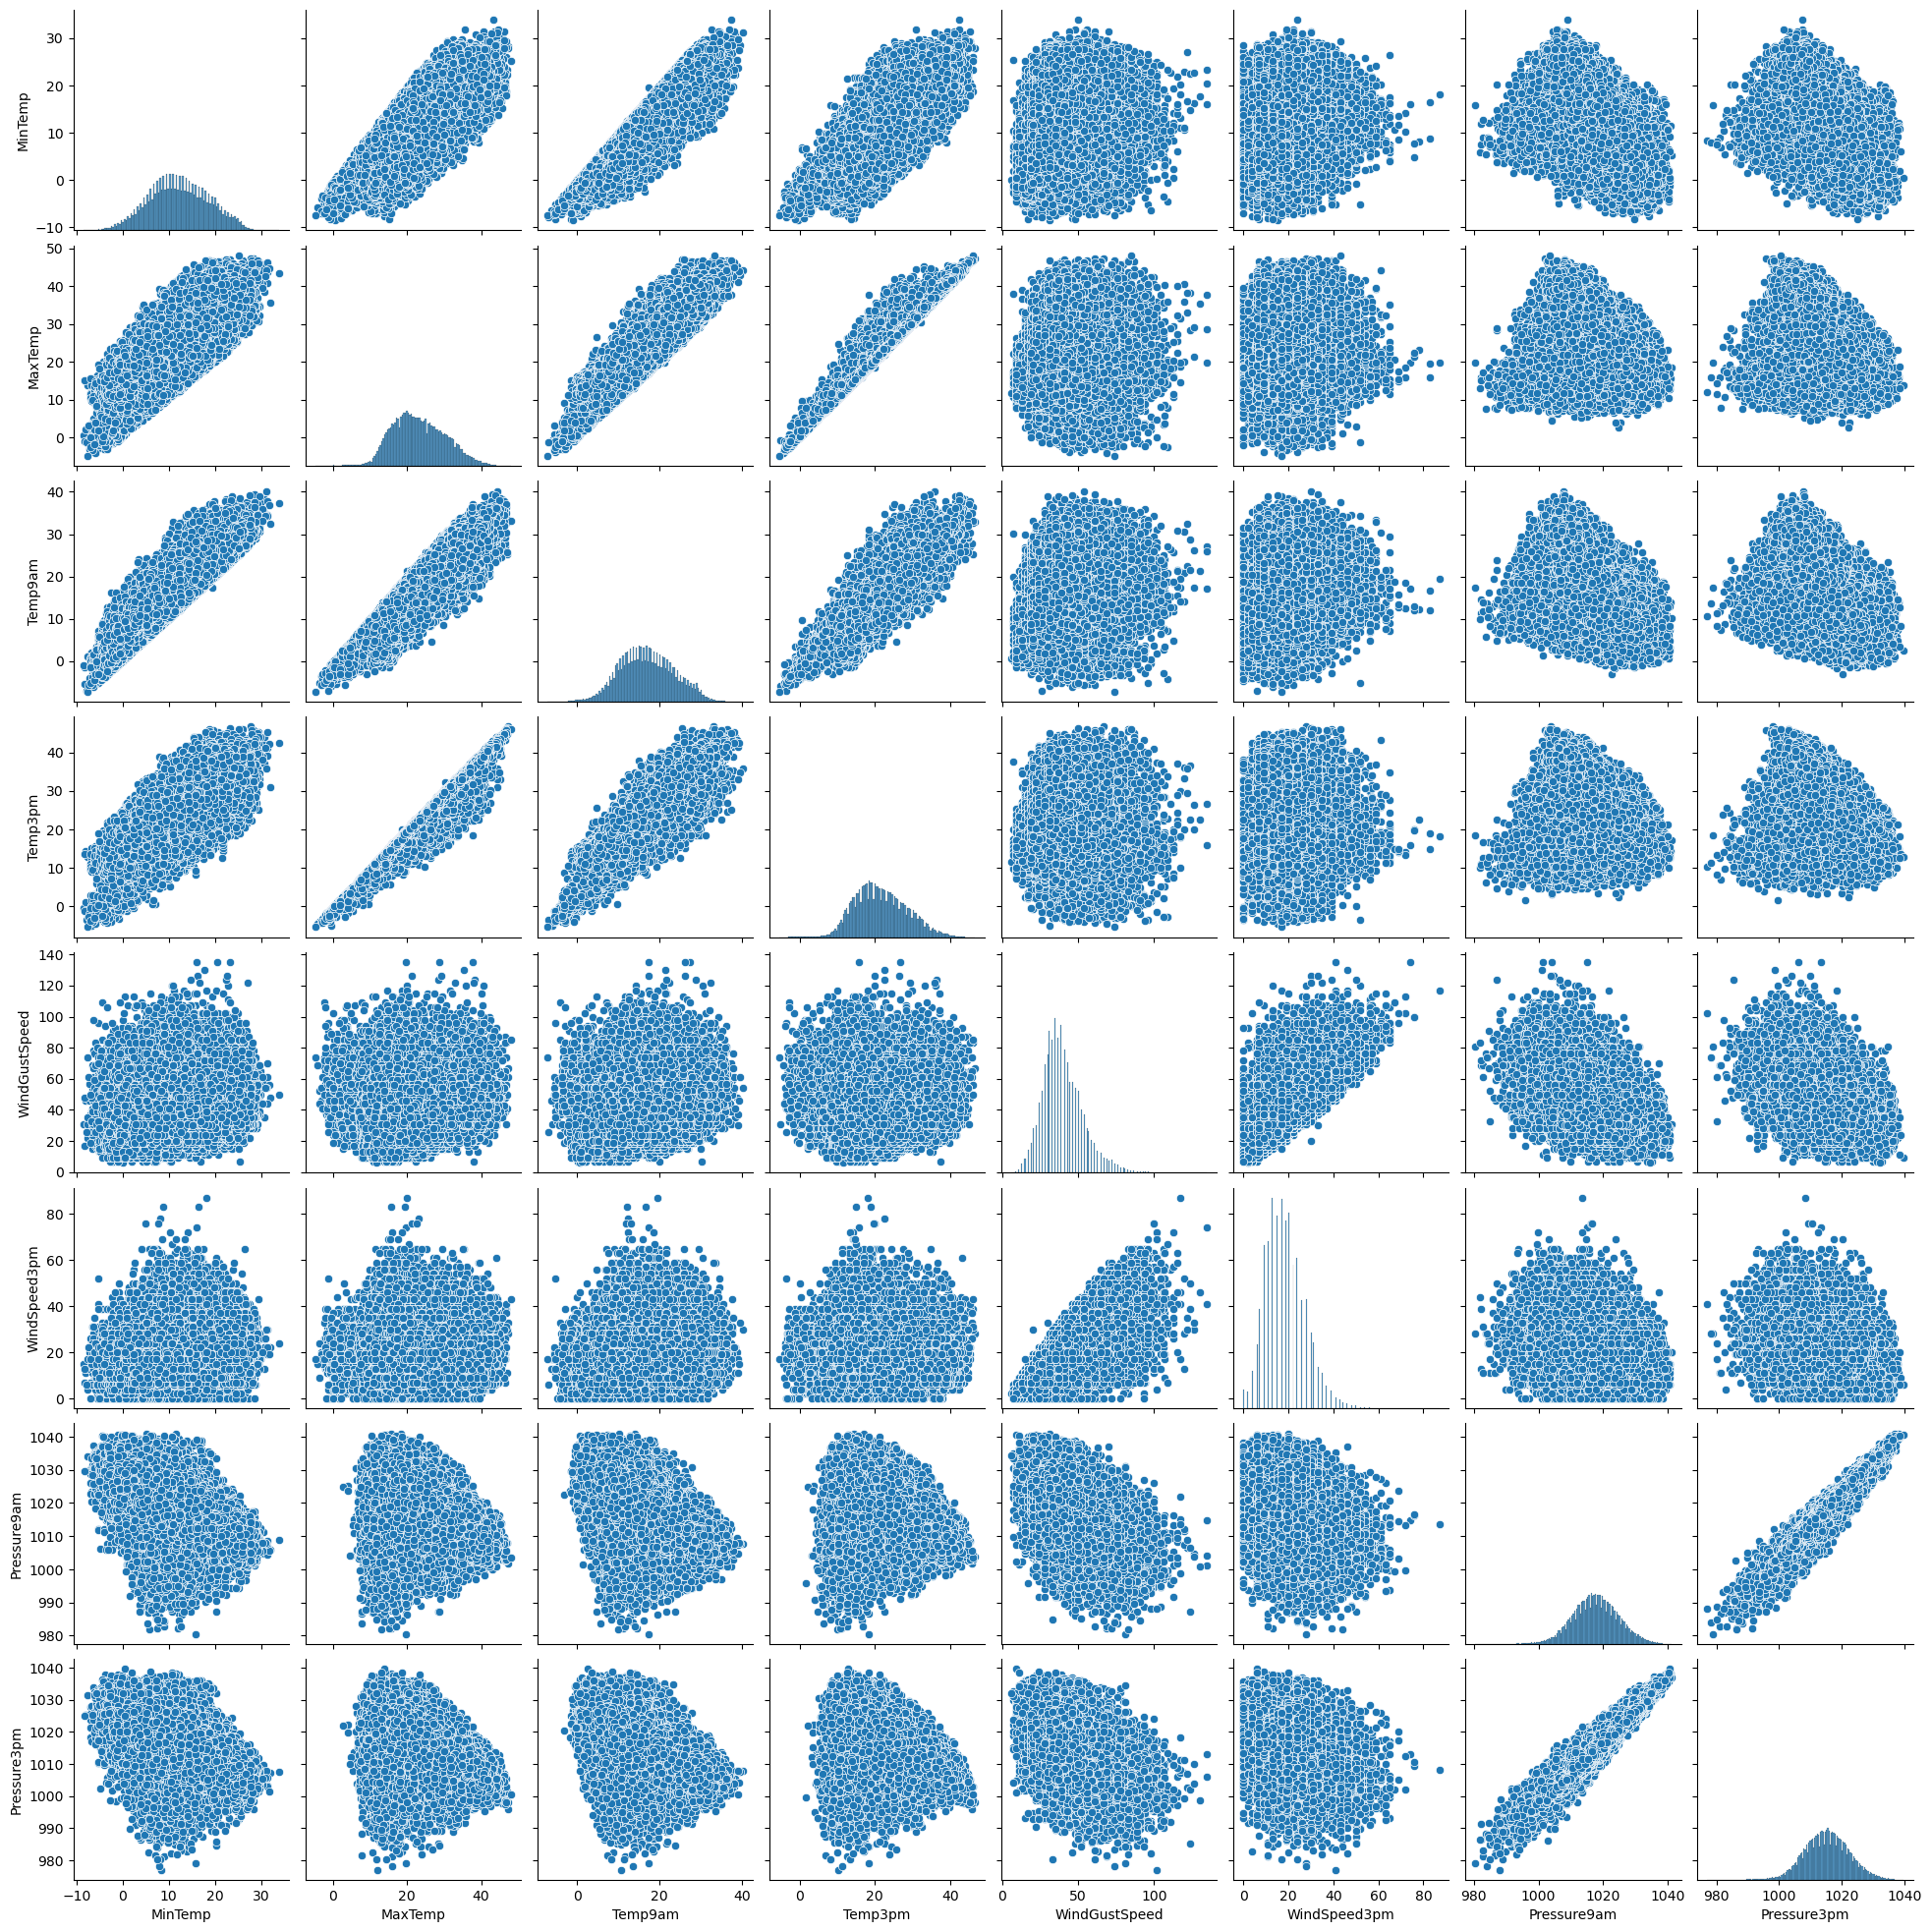

In [50]:

sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [51]:
x = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0,shuffle=True)

In [53]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((113754, 24), (28439, 24))

In [54]:
x_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [55]:
# display categorical variables

categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [56]:
# display numerical variables

numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [57]:
# check missing values in numerical variables in X_train

x_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [58]:
# check missing values in numerical variables in X_test

x_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [59]:
for df1 in [x_train, x_test]:
    for col in numerical:
        col_median=x_train[col].median()
        df1[col].fillna(col_median, inplace=True)      

In [60]:
# check again missing values in numerical variables in X_train

x_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [61]:
# check missing values in numerical variables in X_test

x_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [62]:
for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [63]:
x_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [64]:
x_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [65]:
# check missing values in X_train

x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [66]:
x_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [67]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [68]:
x_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [69]:
x_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [70]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [71]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [72]:
x_train = pd.concat([x_train[numerical], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location), 
                     pd.get_dummies(x_train.WindGustDir),
                     pd.get_dummies(x_train.WindDir9am),
                     pd.get_dummies(x_train.WindDir3pm)], axis=1)

In [73]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
x_test = pd.concat([x_test[numerical], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

In [75]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
cols = x_train.columns

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [78]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [79]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[20903  1164]
 [ 3089  3283]]
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

0.8504518442983228


In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction = dt.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[19028  3039]
 [ 2840  3532]]
              precision    recall  f1-score   support

          No       0.87      0.86      0.87     22067
         Yes       0.54      0.55      0.55      6372

    accuracy                           0.79     28439
   macro avg       0.70      0.71      0.71     28439
weighted avg       0.80      0.79      0.79     28439

0.7932768381448011


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[21226   841]
 [ 3173  3199]]
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439

0.8588557966173213
